In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats
import scipy.interpolate as inter
import plotly.express as px
from sklearn import preprocessing as skprep
import numba
import timeit
from lagrange import Lagrange

Compiled


In [2]:
df = pd.read_csv("DataSet3_2.csv", sep=';', decimal=',')
df["Data"] = pd.to_datetime(df["Data"], dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Data       250 non-null    datetime64[ns]
 1   Dollar     250 non-null    float64       
 2   Oil Brent  250 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 6.0 KB


In [3]:
df

,Data,Dollar,Oil Brent
0,2020-01-01,61.9057,66.39
1,2020-01-09,61.9057,65.34
2,2020-01-10,61.2340,65.02
3,2020-01-11,61.2632,64.84
4,2020-01-14,60.9474,64.42
...,...,...,...
245,2020-12-25,74.8392,52.26
246,2020-12-26,73.6921,50.91
247,2020-12-29,73.7175,50.08
248,2020-12-30,73.6567,51.20


<AxesSubplot:>

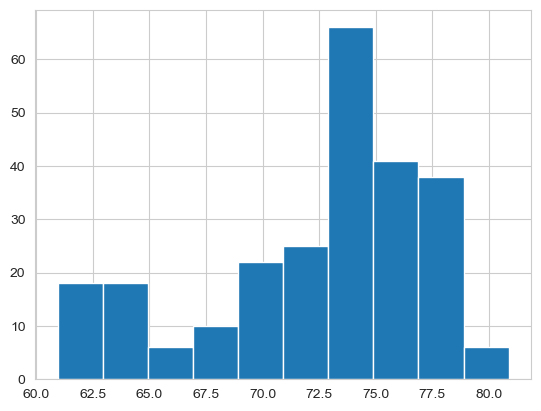

In [4]:
df["Dollar"].hist()

<AxesSubplot:>

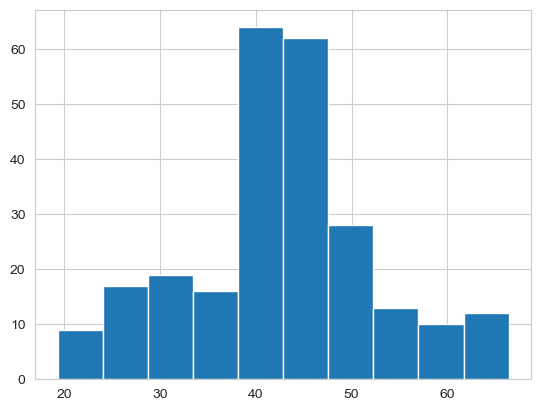

In [5]:
df["Oil Brent"].hist()

In [6]:
df_s = df.sample(250)
# df_s = df_s.reset_index(drop=True)
df_s = df_s.sort_values(by="Data")
df_s

,Data,Dollar,Oil Brent
0,2020-01-01,61.9057,66.39
1,2020-01-09,61.9057,65.34
2,2020-01-10,61.2340,65.02
3,2020-01-11,61.2632,64.84
4,2020-01-14,60.9474,64.42
...,...,...,...
245,2020-12-25,74.8392,52.26
246,2020-12-26,73.6921,50.91
247,2020-12-29,73.7175,50.08
248,2020-12-30,73.6567,51.20


In [7]:
def norm(x):
    return (x - x.min()) / (x.max() - x.min())


def denorm(x, x_min, x_mul):
    return x * x_mul + x_min


y = df_s["Dollar"].values
x = df_s["Data"].values.astype("float64")

x_min = x.min()
x_mul = (x.max() - x.min())
y_min = y.min()
y_mul = (y.max() - y.min())

y = norm(df_s["Dollar"].values)
x = norm(df_s["Data"].values.astype("float64"))

lag = inter.lagrange(x, y)

In [8]:
# lag, len(lag)

In [9]:
my_lag = Lagrange(x, y)

In [10]:
pd.DataFrame({"lag": lag(x), "my lag": my_lag(x), "y": y})

,lag,my lag,y
0,4.807340e-02,0.048073,0.048073
1,-2.853036e+74,0.048073,0.048073
2,-2.119334e+75,0.014377,0.014377
3,-9.610885e+75,0.015842,0.015842
4,3.384627e+78,0.000000,0.000000
...,...,...,...
245,-3.263066e+207,0.696886,0.696886
246,-5.180554e+207,0.639342,0.639342
247,-2.116230e+208,0.640616,0.640616
248,-3.370277e+208,0.637566,0.637566


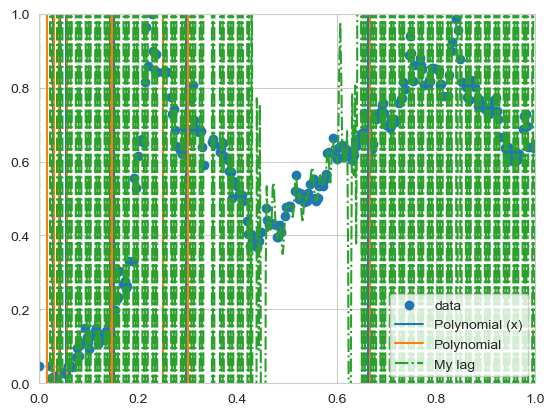

In [11]:
x_new = np.linspace(x.min(), x.max(), num=500, endpoint=True)  # np.arange(x.min(), x.max(), (x.max() - x.min()) / 100)
plt.scatter(x, y, label='data')
plt.plot(np.sort(x), lag(np.sort(x)), label='Polynomial (x)')
plt.plot(x_new, lag(x_new), label='Polynomial')
plt.plot(x_new, my_lag(x_new), '-.', label="My lag")
plt.legend()
ax = plt.gca()
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
plt.show()

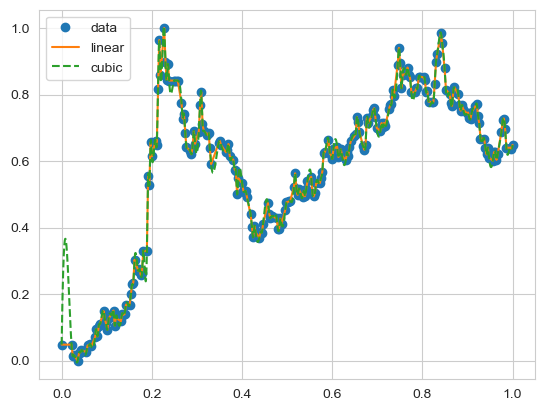

In [12]:
# x = df_s["Timestamp"].values.astype("float64")
# y = df_s["OAT"].values
# x = df["Timestamp"].values.astype("float64")
# y = df["OAT"].values
f = inter.interp1d(x, y)
f2 = inter.interp1d(x, y, kind='cubic')
xnew = np.linspace(x.min(), x.max(), num=60000, endpoint=True)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

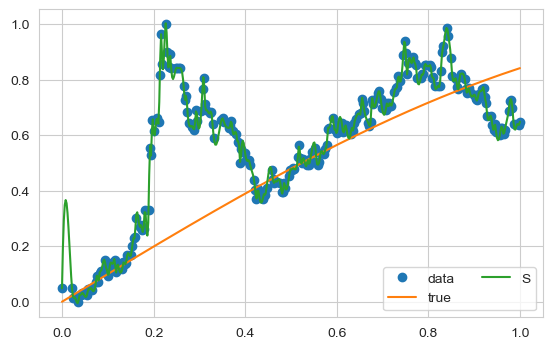

In [17]:
from scipy.interpolate import CubicSpline

cs = CubicSpline(x, y)
xs = x_new
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(x, y, 'o', label='data')
ax.plot(xs, np.sin(xs), label='true')
ax.plot(xs, cs(xs), label="S")
# ax.plot(xs, cs(xs, 1), label="S'")
# ax.plot(xs, cs(xs, 2), label="S''")
# ax.plot(xs, cs(xs, 3), label="S'''")
ax.legend(loc='best', ncol=2)
plt.show()